### Задание 1

In [74]:
#Импортируйте библиотеки pandas и numpy.
import pandas as pd
import numpy as np

#Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn
from sklearn.datasets import load_boston
boston=load_boston()
#boston

In [77]:
#Создайте датафреймы X и y из этих данных.
X=pd.DataFrame(boston.data, columns=boston.feature_names)
y=pd.DataFrame(boston.target, columns=['price'])

In [57]:
#Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)...
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [58]:
#Создайте модель линейной регрессии под названием lr
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [59]:
#Обучите модель на тренировочных данных (используйте все признаки)
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [60]:
#и сделайте предсказание на тестовых.
y_pred = lr.predict(X_test)

In [61]:
check_test=pd.DataFrame({'y_test':y_test['price'], 'y_pred':y_pred.flatten()})
check_test.head()

,y_test,y_pred
173,23.6,28.648960
274,32.4,36.495014
491,13.6,15.411193
72,22.8,25.403213
452,16.1,18.855280


In [62]:
#Вычислите R2 полученных предказаний с помощью r2_score из модуля sklearn.metrics
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)



0.711226005748496

### Задание 2

In [63]:
#Создайте модель под названием model с помощью RandomForestRegressor из модуля sklearn.ensemble.
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, max_depth=12, random_state=42)

In [64]:
#Обучите модель на тренировочных данных...
model.fit(X_train, y_train.values[:, 0])


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=12,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [65]:
#Сделайте предсказание на тестовых данных и посчитайте R2
rf_predict=model.predict(X_test)

In [66]:
r2_score(y_test, rf_predict)

0.8691643189868505

In [67]:
# Значение R2 для RandomForestRegressor (0.8691643189868505) значительно лучше, чем таковое при Линейной регрессии (0.711226005748496)
# Это значит, что модель предсказывает значительно точнее

### *Задание 3

In [68]:
# Вызовите документацию для класса RandomForestRegressor,
# найдите информацию об атрибуте feature_importances_.

#? RandomForestRegressor
model.feature_importances_

array([0.03177896, 0.00158242, 0.00646271, 0.0017163 , 0.01197879,
       0.43972879, 0.01160458, 0.06602488, 0.00504852, 0.01167048,
       0.02062718, 0.01151466, 0.38026172])

In [69]:
#С помощью этого атрибута найдите сумму всех показателей важности,
np.sum(model.feature_importances_)

1.0000000000000002

In [70]:
# установите, какие два признака показывают наибольшую важность
pd.DataFrame([model.feature_importances_], columns=boston.feature_names)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.031779,0.001582,0.006463,0.001716,0.011979,0.439729,0.011605,0.066025,0.005049,0.01167,0.020627,0.011515,0.380262


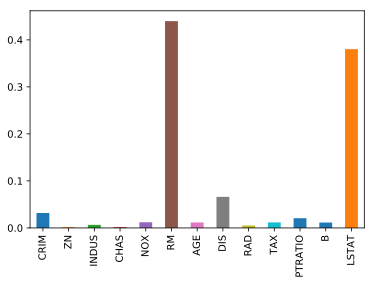

In [78]:
pd.Series(model.feature_importances_, index=boston.feature_names).plot('bar')

In [ ]:
# Наибольшую важность показывают признаки RM и LSTAT